<a href="https://colab.research.google.com/github/MatteoGhizzi/exam_MLPNS/blob/main/Final_exam_MatteoGhizzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/MLPNS

/content/drive/My Drive/MLPNS


In [3]:
!ls

all_ones_benchmark.zip			 test_set_batch10.csv.zip
all_zeros_benchmark.zip			 test_set_batch11.csv.zip
central_pixel_benchmark.zip		 test_set_batch1.csv.zip
country_pop.xls				 test_set_batch2.csv.zip
data_note.pdf.zip			 test_set_batch3.csv.zip
galimgs.npy				 test_set_batch4.csv.zip
gender_submission.csv			 test_set_batch5.csv.zip
healthcare-dataset-stroke-data.csv	 test_set_batch6.csv.zip
HiggsBosonCompetition_AMSMetric_rev1.py  test_set_batch7.csv.zip
images_test_rev1.zip			 test_set_batch8.csv.zip
images_training_rev1			 test_set_batch9.csv.zip
images_training_rev1.zip		 test_set.csv.zip
kaggleHiggs				 test_set_metadata.csv.zip
kaggle.json				 test_set_sample.csv.zip
kaggleTitanic				 training.csv
kalbar_drone_190113-768x512.jpg		 training_set.csv
logs					 training_set.csv.zip
random_submission.zip			 training_set_metadata.csv
sample_submission.csv.zip		 training_solutions_rev1.csv
spm					 training_solutions_rev1.zip
spm-20210427T111354Z-001.zip		 training.zip
stroke-prediction

In [4]:
import pandas as pd
import json
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
lcvs = pd.read_csv("training_set.csv")

In [6]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [7]:
lcvs.tail()


,object_id,mjd,passband,flux,flux_err,detected
1421700,130779836,60555.9838,4,-39.881969,46.477093,0
1421701,130779836,60560.0459,1,14.894439,18.947685,0
1421702,130779836,60571.0225,5,30.593130,50.695290,0
1421703,130779836,60585.9974,4,-23.471439,44.819859,0
1421704,130779836,60588.0372,0,-41.214264,51.665123,0


In [8]:
lcvs.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


In [9]:
lcvs.dtypes

object_id      int64
mjd          float64
passband       int64
flux         float64
flux_err     float64
detected       int64
dtype: object

In [10]:
print("The dataset contains: (observations, columns)", lcvs.shape)

The dataset contains: (observations, columns) (1421705, 6)


In [11]:
bands = lcvs["passband"].unique()
bands.sort()
print("Passbands (filter) identifiers:", bands)


Passbands (filter) identifiers: [0 1 2 3 4 5]


In [12]:
norm_band = Normalize(vmin=bands.min(), vmax=bands.max())

In [13]:
set_cmap(plasma())

<Figure size 432x288 with 0 Axes>

conto quanti oggetti sono presenti nel dataset

In [14]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [15]:
#metadata = pd.read_csv("training_set_metadata.csv")
#metadata.head()

acquisizione e lettura metadati

In [16]:
metadata = pd.read_csv("https://raw.githubusercontent.com/MatteoGhizzi/MLPNS2021/main/training_set_metadata.csv")
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [17]:
metadata.tail()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
7843,130739978,26.718750,-14.940303,172.342697,-72.255675,0,0.0000,0.0000,0.0000,NaN,0.013,65
7844,130755807,120.101349,-62.696659,275.742955,-16.509746,0,0.1725,2.5606,1.1146,46.6108,0.136,90
7845,130762946,203.108109,-55.682144,308.728904,6.727511,0,0.0000,0.0000,0.0000,NaN,0.430,16
7846,130772921,79.101562,-35.501846,239.172243,-33.827844,0,0.0000,0.0000,0.0000,NaN,0.034,65
7847,130779836,301.992188,-17.426323,25.102988,-24.511101,0,0.0000,0.0000,0.0000,NaN,0.091,6


In [18]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [19]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


#TASK II  data exploration and visualization 

ogni oggetto ha 6 curve da plottare, 1 per ogni filtro, con due cicli 'for' faccio correre sulgi oggetti e stampo una figura nella quale per rappresenterò una curva per  ogni filtro

In [20]:
objects[::700]

array([      615,    115937,    229855,    340017,  15929116,  31601139,
        47844589,  64006420,  80301338,  95735933, 111702099, 127752560])

In [21]:
norm_band = Normalize(vmin=615, vmax=127752560)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will

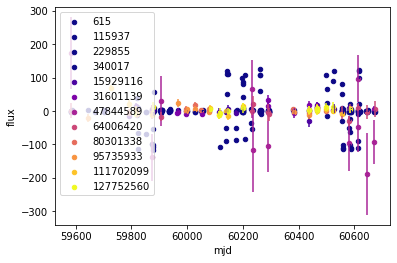

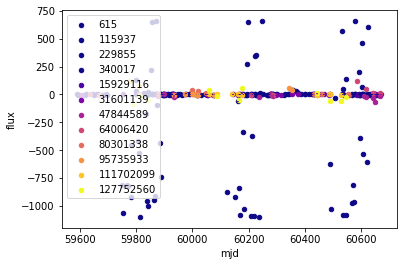

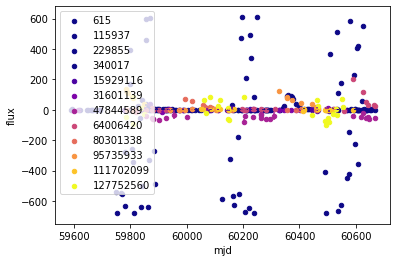

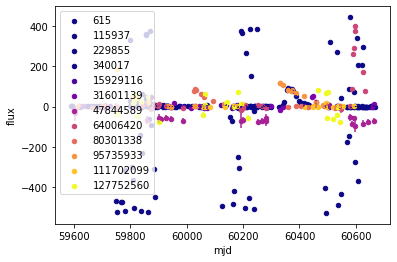

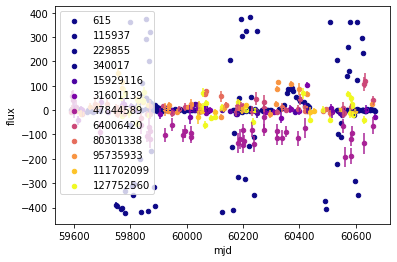

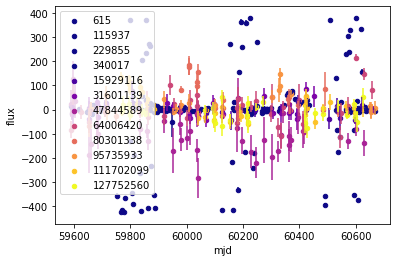

In [22]:
for j in bands:
   figure = pl.figure().add_subplot(111)
   for i in objects[::700]:
       lcvs[lcvs.object_id == i][lcvs.passband == j].plot(x= 'mjd', y= 'flux', yerr = 'flux_err', ax= figure, kind= 'scatter',
                                                          color=pl.cm.plasma(norm_band(i)))
   pl.legend(objects[::700])   


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will

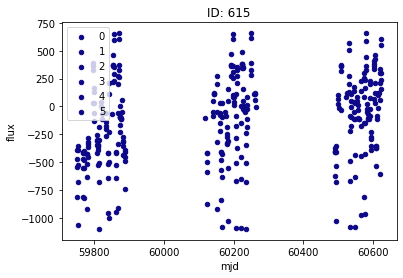

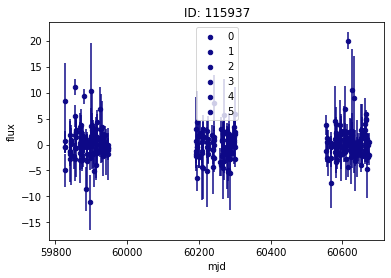

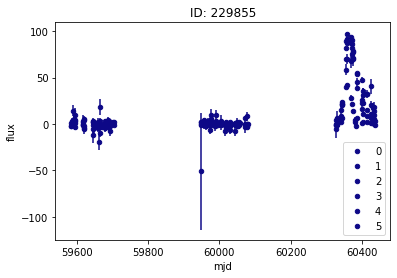

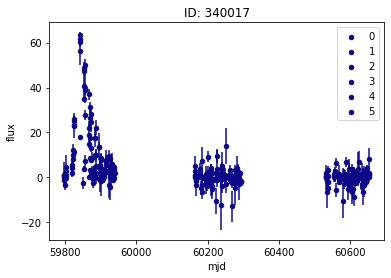

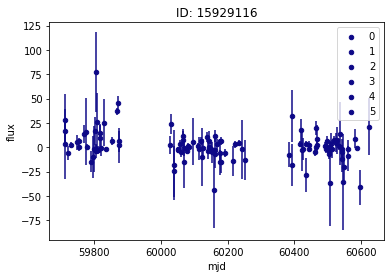

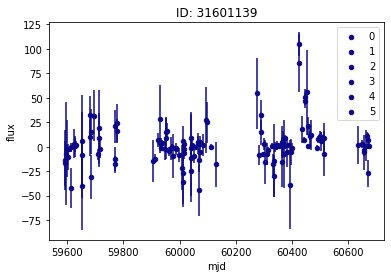

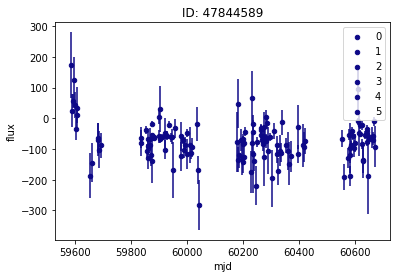

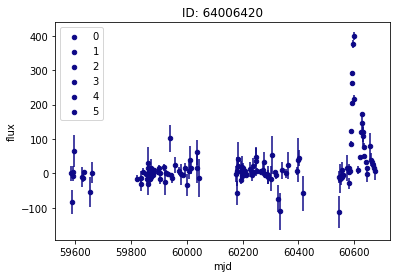

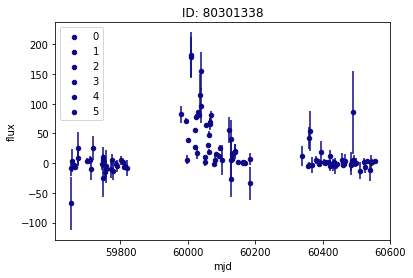

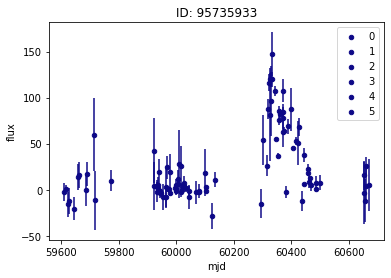

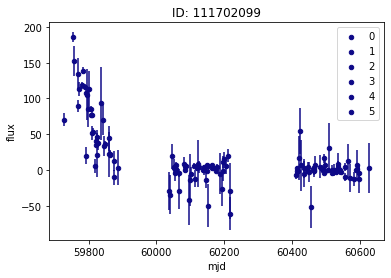

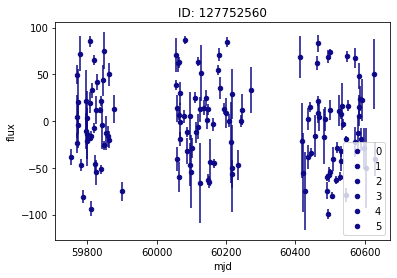

In [23]:
for i in objects[::700]:
    figure = pl.figure().add_subplot(111)
    for j in bands:
        lcvs[lcvs.object_id == i][lcvs.passband == j].plot(x= 'mjd', y= 'flux', yerr = 'flux_err', ax= figure, kind= 'scatter', 
                                                      color=pl.cm.plasma(norm_band(j)))
    pl.legend(bands)
    pl.title("ID: %d" %i)
    
   

in ogni plot sembrano esserci 3/4  intervalli temporali, in alcuni plot le incertezze sono molto elevate 

 sono presenti anche degli outliers (es: ID229855) 

realizzo plot per l'oggetto ID:84716

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

Text(0.5, 1.0, 'ID: 84716')

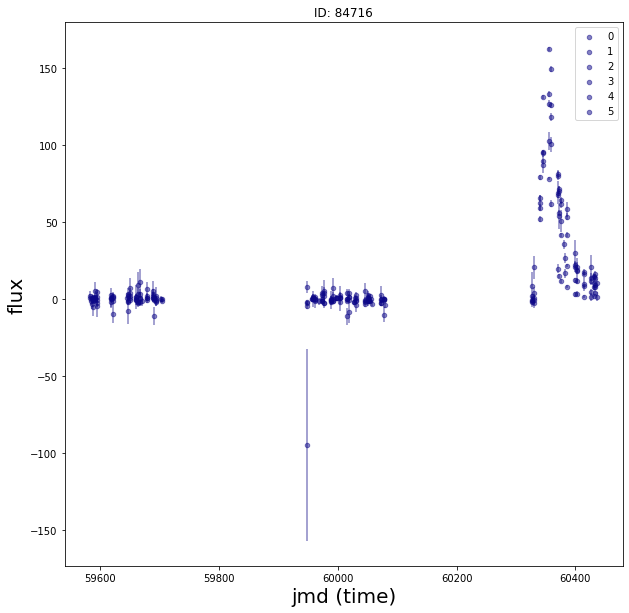

In [24]:
figure= pl.figure(figsize=(10,10)).add_subplot(111)
for j in bands:
        lcvs[lcvs.object_id == 84716 ][lcvs.passband == j].plot(x= "mjd", y= "flux", yerr = "flux_err", ax= figure, kind= "scatter", 
                                                      color=pl.cm.plasma(norm_band(j)), alpha=0.5)
pl.legend(bands)
pl.xlabel('jmd (time)', fontsize=20)
pl.ylabel('flux', fontsize=20)
pl.title("ID: %d" %84716)
    

anche in questo caso sembra essere presente un outlier 

per due periodi la light curve è nulla mentre presenta un picco nel terzo periodo di osservazione

#task: 3

features extraction

estrazione della media e della standard deviation di ogni light curve

il dataset va raggruppatto dunque per oggetto e  per filtro

In [25]:
means = lcvs.groupby(["object_id", "passband"])[["flux"]].mean()
stds = lcvs.groupby(["object_id", "passband"])[["flux"]].std()

In [26]:
means.head()

flux
object_id passband            
615       0          -3.254554
          1        -385.699911
          2        -134.146566
          3        -121.103501
          4         -55.954592

In [27]:
stds.head()

flux
object_id passband            
615       0          83.944735
          1         601.787302
          2         455.121346
          3         335.425053
          4         291.803449

le features verranno inglobate nel dataframe come float

in realtà queste due features potrebbero essere fuorvianti:

è possibile che due curve possano avere media e deviazione standard simili ma essere completamente differenti



Creazione del dataframe features per raggruppare tutte le possibili features da usare perla classificazione

In [28]:
features = means.rename({"flux": "mean"}, 
                        axis=1).merge(stds.rename({"flux": "std"}, 
                                axis=1), left_index=True, right_index=True)

In [29]:
features.head()

mean         std
object_id passband                        
615       0          -3.254554   83.944735
          1        -385.699911  601.787302
          2        -134.146566  455.121346
          3        -121.103501  335.425053
          4         -55.954592  291.803449

In [30]:
from scipy import stats 

In [31]:
def m2(x):
    return stats.moment(x, moment = 2)

def m3(x):
    return stats.moment(x, moment = 3) 

def m4(x):
    return stats.moment(x, moment = 4)    

m2 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m2)
m3 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m3)
m4 = lcvs.groupby(["object_id", "passband"])["flux"].apply(m4)


 


In [32]:
maxs = lcvs.groupby(["object_id", "passband"])["flux"].max()
mins = lcvs.groupby(["object_id", "passband"])["flux"].min()

In [33]:
features = features.merge(pd.DataFrame(maxs).rename({"flux":"maxs"}, axis= 1), 
                          left_index=True, right_index=True)
features = features.merge(pd.DataFrame(mins).rename({"flux":"mins"}, axis= 1), 
                          left_index=True, right_index=True)

Calcolo la skewness e kurthosis

In [34]:
def skew(x):
    return stats.skew(x)

def kurt(x):
    return stats.kurtosis(x) 


skew = lcvs.groupby(["object_id", "passband"])["flux"].apply(skew)
kurt = lcvs.groupby(["object_id", "passband"])["flux"].apply(kurt)

In [35]:
features["skewness"] = skew
features["kurtosis"] = kurt

In [36]:
features.head()

mean         std  ...  skewness  kurtosis
object_id passband                          ...                    
615       0          -3.254554   83.944735  ...  0.125827 -1.454426
          1        -385.699911  601.787302  ...  0.404755 -1.251198
          2        -134.146566  455.121346  ...  0.331063 -1.392937
          3        -121.103501  335.425053  ...  0.285492 -1.429545
          4         -55.954592  291.803449  ...  0.194883 -1.519722

[5 rows x 6 columns]

# normalizzazione curve 

creo la colonna flunormed nel dataset

In [37]:
lcvs["fluxnormed"] = 0.

In [38]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,fluxnormed
0,615,59750.4229,2,-544.810303,3.622952,1,0.0
1,615,59750.4306,1,-816.434326,5.553370,1,0.0
2,615,59750.4383,3,-471.385529,3.801213,1,0.0
3,615,59750.4450,4,-388.984985,11.395031,1,0.0
4,615,59752.4070,2,-681.858887,4.041204,1,0.0


definisco la funzione che normalizza il flusso:

 applica alla variabile flusso del dataframe df selezionato la normalizzazione

In [39]:
def normed(df):
   df['fluxnormed'] = df.agg({'flux' : lambda x: (x - x.mean())/x.std()})
   return df

In [40]:
lcvs = lcvs.groupby(["object_id", "passband"]).apply(normed)

In [41]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,fluxnormed
0,615,59750.4229,2,-544.810303,3.622952,1,-0.902317
1,615,59750.4306,1,-816.434326,5.553370,1,-0.715759
2,615,59750.4383,3,-471.385529,3.801213,1,-1.044293
3,615,59750.4450,4,-388.984985,11.395031,1,-1.141283
4,615,59752.4070,2,-681.858887,4.041204,1,-1.203442


calcolo minimi e massimi del flusso normalizzato

In [42]:
maxs_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].max()
mins_standardized = lcvs.groupby(["object_id", "passband"])["fluxnormed"].min()

In [43]:
features["maxNormed"] = maxs_standardized
features["minNormed"] = mins_standardized

In [44]:
medians = lcvs.groupby(["object_id", "passband"])[["fluxnormed"]].median()

In [45]:
features = features.merge(pd.DataFrame(medians).rename({"fluxnormed":"median"}, axis=1), 
                          left_index=True, right_index=True)

In [46]:
features.head()

mean         std  ...  minNormed    median
object_id passband                          ...                     
615       0          -3.254554   83.944735  ...  -1.353970 -0.080537
          1        -385.699911  601.787302  ...  -1.187696 -0.170090
          2        -134.146566  455.121346  ...  -1.203442 -0.289021
          3        -121.103501  335.425053  ...  -1.220962 -0.122434
          4         -55.954592  291.803449  ...  -1.255057 -0.163078

[5 rows x 9 columns]

fit delle curve di luce normalizzate

definisco funzione di fit da far passare su un gruppo

In [47]:
def linfit(x):

    pars = np.polyfit(range(len(x['mjd'])), x['fluxnormed'],1)
    
    return pars

linfits = lcvs.groupby(["object_id", "passband"]).apply(linfit)

In [48]:
linfits.shape

(47088,)

In [49]:
linfits.dtype

dtype('O')

trasformo output in arrays e recupero le due features di interesse: slope e intercept

In [50]:
linfits = np.asarray(linfits)

In [51]:
linfits

array([array([ 0.00567572, -0.1759473 ]),
       array([ 0.01403164, -0.39990172]),
       array([ 0.0176758 , -0.50376022]), ...,
       array([-0.09225159,  0.9686417 ]),
       array([-0.03887521,  0.48594017]),
       array([-0.06448633,  0.61262012])], dtype=object)

In [52]:
slopes = [x[0] for x in linfits[:]]
intercepts = [x[1] for x in linfits[:]]

In [53]:
slopes = numpy.asarray(slopes)
slopes

array([ 0.00567572,  0.01403164,  0.0176758 , ..., -0.09225159,
       -0.03887521, -0.06448633])

In [54]:
intercepts = numpy.asarray(intercepts)
intercepts

array([-0.1759473 , -0.39990172, -0.50376022, ...,  0.9686417 ,
        0.48594017,  0.61262012])

In [55]:
features["slopes"] = slopes
features["intercepts"] = intercepts

In [56]:
features

mean           std  ...    slopes  intercepts
object_id passband                             ...                      
615       0           -3.254554     83.944735  ...  0.005676   -0.175947
          1         -385.699911    601.787302  ...  0.014032   -0.399902
          2         -134.146566    455.121346  ...  0.017676   -0.503760
          3         -121.103501    335.425053  ...  0.020475   -0.583524
          4          -55.954592    291.803449  ...  0.022343   -0.636786
...                         ...           ...  ...       ...         ...
130779836 1          725.169852   1197.557111  ... -0.189355    1.041452
          2         2690.360415   6440.422386  ... -0.060001    0.720011
          3          755.993902   1443.868085  ... -0.092252    0.968642
          4         3489.185336  11006.766106  ... -0.038875    0.485940
          5         4151.358875   8687.101173  ... -0.064486    0.612620

[47088 rows x 11 columns]

fit light curves con polinomio di secondo grado 

In [57]:
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
ols?

In [59]:
import numpy as np

In [60]:
lcvs.groupby(["object_id", "passband"]).head()

,object_id,mjd,passband,flux,flux_err,detected,fluxnormed
0,615,59750.4229,2,-544.810303,3.622952,1,-0.902317
1,615,59750.4306,1,-816.434326,5.553370,1,-0.715759
2,615,59750.4383,3,-471.385529,3.801213,1,-1.044293
3,615,59750.4450,4,-388.984985,11.395031,1,-1.141283
4,615,59752.4070,2,-681.858887,4.041204,1,-1.203442
...,...,...,...,...,...,...,...
1421623,130779836,60055.3265,1,848.485596,24.222153,1,0.102973
1421624,130779836,60056.3560,3,1475.042236,30.874821,1,0.498001
1421632,130779836,60080.3289,0,129.561722,54.132854,0,-0.322119
1421633,130779836,60087.2501,1,441.659821,21.284473,1,-0.236740


faccio passare una funzione che minimizza gli scarti quadratici data la 'formula' e estraggo il parametro che indica la log-likelihood per ognuno dei due modelli fittati

In [61]:
def quadfit(df) :
    df['x'] = range(len(df['mjd']))
    y = df['fluxnormed']
    mod1 = ols(formula= 'y~x + 1', data= df).fit()
    mod2 = ols(formula= 'y~pow(x, 2) + x + 1', data= df).fit()

    pars = mod1.llf, mod2.llf

    return pars

ols = lcvs.groupby(["object_id", "passband"]).apply(quadfit)

In [62]:
ll1 = [x[0] for x in ols.values[:]]
ll2 = [x[1] for x in ols.values[:]]

eseguo un fit parabolico per estrarre il segno del coefficiente del termine di secondo ordine: indica la concavità/convessità delle light-curve

In [63]:
def parabfit(x):

    fit2 = np.polyfit(range(len(x['mjd'])), x['fluxnormed'].values, 2)

    return fit2[0]

conv = lcvs.groupby(["object_id", "passband"]).apply(parabfit)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/ops.py:973: RankWarning: Polyfit may be poorly conditioned
  return libreduction.apply_frame_axis0(sdata, f, names, starts, ends)


trasformazione del risultato in array e 'estrazione' del segno

In [64]:
conv = np.asarray(conv)
conv1 = np.sign(conv)

In [65]:
conv1, conv1.shape

(array([-1., -1., -1., ...,  1., -1., -1.]), (47088,))

inserisco le features estratte nel dataframe che conterrà tutte le features 

In [66]:
features["like1D"] = ll1
features["like2D"] = ll2
features["convexity"] = conv1


#Task III.5: show your engineered feature space and add features from the metadata file

In [67]:
features.head()

mean         std  ...     like2D  convexity
object_id passband                          ...                      
615       0          -3.254554   83.944735  ... -85.295765       -1.0
          1        -385.699911  601.787302  ... -80.118304       -1.0
          2        -134.146566  455.121346  ... -79.081316       -1.0
          3        -121.103501  335.425053  ... -78.053439       -1.0
          4         -55.954592  291.803449  ... -76.992805       -1.0

[5 rows x 14 columns]

In [68]:
features.shape

(47088, 14)

Selezione delle features prima della manipolazione: 
è necessario scegliere le features più adeguate

media e standard deviation potrebbero non essere i parametri migliori, sceglierò sicuramente skewness e kurtosis per avere indicazioni utili su simmetria e caratteristiche della light curve, stesso ragionamento per il parametro convexity

il massimo e il minimo del flusso dipendono molto da outliers nelle curve quindi non li aggiungerò non avendone calcolato l'errore

la mediana può essere una feature migliore della media dati gli outliers 

loglikelihood dei fit aiutano a determinare che tipo di curva aderisce meglio alla light curve, potrebbero avere senso, nel dubbio scelgo di 'stare abbondante' e poi valutare le scelte in base alla feautre importance


In [69]:
features = features.drop('mean', axis= 1)
features1 = features.drop('std', axis= 1)
features2 = features1.drop('maxs', axis= 1)
features3 = features2.drop('mins', axis= 1)
features3.shape

(47088, 10)

 manipolazione del dataframe: voglio unirlo ai metadati!

 bisogna far si di avere solo gli oggetti come riga,  i valori estratti erano per ogni oggetto e per ogni filtro dunque avrò 6*features + metadata

In [70]:
allfeatures = features3.reset_index().set_index(['object_id','passband']).stack(
    ).unstack([1,2])

In [71]:
allfeatures.head()

passband          0                      ...          5                     
           skewness  kurtosis maxNormed  ...     like1D     like2D convexity
object_id                                ...                                
615        0.125827 -1.454426  1.530023  ... -76.562426 -76.055343      -1.0
713        0.254446 -1.027516  2.422184  ... -65.473627 -65.441093      -1.0
730        0.349431  0.359725  3.275377  ... -69.595619 -69.594996      -1.0
745        1.980815  4.232286  3.707100  ... -77.480973 -71.951761      -1.0
1124      -0.324207  0.664903  1.978734  ... -78.409038 -78.295201      -1.0

[5 rows x 60 columns]

In [72]:
allfeatures.shape

(7848, 60)

In [73]:
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


unisco dataframe di metadata e features modificato

dai metadata prendo ddf e taget (serviranno nella classificazione), decl è la posizione dell'oggetto( mi dice se osservo qualcosa di extra galttico o meno) 

In [74]:
allfeatures = allfeatures.merge(metadata[['object_id', 'decl', 'ddf', 'hostgal_photoz', 
                                          'hostgal_photoz_err', 'target']], on='object_id')
allfeatures.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,object_id,"(0, skewness)","(0, kurtosis)","(0, maxNormed)","(0, minNormed)","(0, median)","(0, slopes)","(0, intercepts)","(0, like1D)","(0, like2D)","(0, convexity)","(1, skewness)","(1, kurtosis)","(1, maxNormed)","(1, minNormed)","(1, median)","(1, slopes)","(1, intercepts)","(1, like1D)","(1, like2D)","(1, convexity)","(2, skewness)","(2, kurtosis)","(2, maxNormed)","(2, minNormed)","(2, median)","(2, slopes)","(2, intercepts)","(2, like1D)","(2, like2D)","(2, convexity)","(3, skewness)","(3, kurtosis)","(3, maxNormed)","(3, minNormed)","(3, median)","(3, slopes)","(3, intercepts)","(3, like1D)","(3, like2D)","(3, convexity)","(4, skewness)","(4, kurtosis)","(4, maxNormed)","(4, minNormed)","(4, median)","(4, slopes)","(4, intercepts)","(4, like1D)","(4, like2D)","(4, convexity)","(5, skewness)","(5, kurtosis)","(5, maxNormed)","(5, minNormed)","(5, median)","(5, slopes)","(5, intercepts)","(5, like1D)","(5, like2D)","(5, convexity)",decl,ddf,hostgal_photoz,hostgal_photoz_err,target
0,615,0.125827,-1.454426,1.530023,-1.353970,-0.080537,0.005676,-0.175947,-88.546307,-85.295765,-1.0,0.404755,-1.251198,1.738698,-1.187696,-0.170090,0.014032,-0.399902,-80.118357,-80.118304,-1.0,0.331063,-1.392937,1.639411,-1.203442,-0.289021,0.017676,-0.503760,-79.087868,-79.081316,-1.0,0.285492,-1.429545,1.689917,-1.220962,-0.122434,0.020475,-0.583524,-78.101942,-78.053439,-1.0,0.194883,-1.519722,1.500696,-1.255057,-0.163078,0.022343,-0.636786,-77.340432,-76.992805,-1.0,0.121948,-1.559937,1.443920,-1.273376,-0.129163,0.021319,-0.596932,-76.562426,-76.055343,-1.0,-61.943836,1,0.0000,0.0000,92
1,713,0.254446,-1.027516,2.422184,-1.689009,-0.052914,-0.041433,1.429423,-55.377815,-55.177686,1.0,-0.085494,-1.106890,1.776651,-1.872430,0.080189,-0.051648,1.420320,-44.338079,-43.188530,-1.0,-0.022066,-1.190242,1.962189,-1.607018,0.117188,-0.053887,1.481892,-37.509888,-37.093196,-1.0,-0.162664,-1.148634,1.909534,-1.768511,0.141552,-0.050983,1.402038,-46.035261,-44.505772,-1.0,-0.062403,-1.191860,1.674452,-1.777206,0.016870,-0.050464,1.387765,-47.278095,-47.275384,1.0,0.212294,-0.832902,2.335056,-1.750333,-0.094281,-0.037903,1.042343,-65.473627,-65.441093,-1.0,-27.784405,1,1.6267,0.2552,88
2,730,0.349431,0.359725,3.275377,-1.865565,0.039463,-0.001798,0.063840,-101.609041,-101.601723,-1.0,0.457635,0.771778,3.072136,-1.955556,0.016754,0.003167,-0.080770,-73.219956,-72.790802,-1.0,2.315707,4.537795,3.344527,-0.944280,-0.343392,0.026905,-0.686084,-68.552448,-68.540481,1.0,2.584661,6.345498,3.703123,-1.058591,-0.314425,0.024491,-0.624531,-69.426145,-69.321498,-1.0,2.462542,5.385640,3.440716,-0.947219,-0.308522,0.022552,-0.563811,-68.820328,-68.814826,-1.0,1.630520,3.125970,3.207938,-1.777517,-0.149763,0.019612,-0.490299,-69.595619,-69.594996,-1.0,-6.579593,1,0.2262,0.0157,42
3,745,1.980815,4.232286,3.707100,-1.296592,-0.169349,-0.013089,0.464675,-98.851741,-93.623005,-1.0,6.817994,46.333887,7.183876,-0.359558,-0.185994,-0.003826,0.105205,-78.846823,-77.713373,-1.0,5.534683,32.840271,6.605035,-0.371465,-0.290606,-0.003878,0.106641,-78.843814,-76.091843,-1.0,3.650356,14.859786,5.400349,-0.553567,-0.373246,-0.003931,0.108112,-78.840690,-73.609053,-1.0,3.382600,12.445025,5.155838,-0.865731,-0.358773,-0.004774,0.131296,-78.785748,-73.539427,-1.0,3.083716,10.952063,5.017901,-0.805657,-0.306851,-0.002816,0.076043,-77.480973,-71.951761,-1.0,-45.586655,1,0.2813,1.1523,90
4,1124,-0.324207,0.664903,1.978734,-3.163298,-0.033864,0.017117,-0.530614,-85.624795,-85.456166,-1.0,2.315295,5.496244,4.013005,-0.895063,-0.429236,0.028666,-0.816982,-74.050830,-74.027835,1.0,2.995322,9.371163,4.522907,-0.578264,-0.438785,0.025384,-0.723449,-75.906108,-75.871036,-1.0,3.509344,12.807986,4.900216,-0.528606,-0.383411,0.021342,-0.608237,-77.759349,-77.582974,-1.0,3.802308,14.897216,4.976346,-0.984514,-0.303771,0.019736,-0.562470,-78.379613,-77.936931,-1.0,3.560347,13.095559,4.770825,-0.828439,-0.229697,0.015555,-0.435534,-78.409038,-78.295201,-1.0,-63.823658,1,0.2415,0.0176,90


In [75]:
allfeatures.shape

(7848, 66)

rimuovo la feature riferita all'object ID: di sicuro non mi servirà nella classificazione

In [76]:
allfeatures1 = allfeatures.drop('object_id', axis= 1)

In [77]:
print("My feature space is {} features (columns)".format(allfeatures1.shape[1]))

My feature space is 65 features (columns)


In [78]:
print("data types of my features"),print(allfeatures1.dtypes)

data types of my features
(0, skewness)         float64
(0, kurtosis)         float64
(0, maxNormed)        float64
(0, minNormed)        float64
(0, median)           float64
                       ...   
decl                  float64
ddf                     int64
hostgal_photoz        float64
hostgal_photoz_err    float64
target                  int64
Length: 65, dtype: object


(None, None)



#Task IV

creazione train and test set dalle features

controllo se ho Nan o infiniti

In [79]:
allfeatures1.isna().sum().sum()

0

In [80]:
np.isinf(allfeatures1).sum().sum()

0

In [81]:
allfeatures1.shape

(7848, 65)

In [82]:
allfeatures2 = allfeatures1.dropna(axis=1, how='all')
allfeatures2.shape

(7848, 65)

non ho trovato ne NaN ne infiniti

seleziono le target variable che mi interessano

In [83]:
labels1 = allfeatures['ddf']
labels2 = allfeatures['target']

creo nuovo set di dati in cui andrò a togliere le due labels selezionate

In [84]:
allfeatures3 = allfeatures2.drop('ddf', axis= 1)
allfeatures3 = allfeatures3.drop('target', axis= 1)
allfeatures3.head()

,"(0, skewness)","(0, kurtosis)","(0, maxNormed)","(0, minNormed)","(0, median)","(0, slopes)","(0, intercepts)","(0, like1D)","(0, like2D)","(0, convexity)","(1, skewness)","(1, kurtosis)","(1, maxNormed)","(1, minNormed)","(1, median)","(1, slopes)","(1, intercepts)","(1, like1D)","(1, like2D)","(1, convexity)","(2, skewness)","(2, kurtosis)","(2, maxNormed)","(2, minNormed)","(2, median)","(2, slopes)","(2, intercepts)","(2, like1D)","(2, like2D)","(2, convexity)","(3, skewness)","(3, kurtosis)","(3, maxNormed)","(3, minNormed)","(3, median)","(3, slopes)","(3, intercepts)","(3, like1D)","(3, like2D)","(3, convexity)","(4, skewness)","(4, kurtosis)","(4, maxNormed)","(4, minNormed)","(4, median)","(4, slopes)","(4, intercepts)","(4, like1D)","(4, like2D)","(4, convexity)","(5, skewness)","(5, kurtosis)","(5, maxNormed)","(5, minNormed)","(5, median)","(5, slopes)","(5, intercepts)","(5, like1D)","(5, like2D)","(5, convexity)",decl,hostgal_photoz,hostgal_photoz_err
0,0.125827,-1.454426,1.530023,-1.353970,-0.080537,0.005676,-0.175947,-88.546307,-85.295765,-1.0,0.404755,-1.251198,1.738698,-1.187696,-0.170090,0.014032,-0.399902,-80.118357,-80.118304,-1.0,0.331063,-1.392937,1.639411,-1.203442,-0.289021,0.017676,-0.503760,-79.087868,-79.081316,-1.0,0.285492,-1.429545,1.689917,-1.220962,-0.122434,0.020475,-0.583524,-78.101942,-78.053439,-1.0,0.194883,-1.519722,1.500696,-1.255057,-0.163078,0.022343,-0.636786,-77.340432,-76.992805,-1.0,0.121948,-1.559937,1.443920,-1.273376,-0.129163,0.021319,-0.596932,-76.562426,-76.055343,-1.0,-61.943836,0.0000,0.0000
1,0.254446,-1.027516,2.422184,-1.689009,-0.052914,-0.041433,1.429423,-55.377815,-55.177686,1.0,-0.085494,-1.106890,1.776651,-1.872430,0.080189,-0.051648,1.420320,-44.338079,-43.188530,-1.0,-0.022066,-1.190242,1.962189,-1.607018,0.117188,-0.053887,1.481892,-37.509888,-37.093196,-1.0,-0.162664,-1.148634,1.909534,-1.768511,0.141552,-0.050983,1.402038,-46.035261,-44.505772,-1.0,-0.062403,-1.191860,1.674452,-1.777206,0.016870,-0.050464,1.387765,-47.278095,-47.275384,1.0,0.212294,-0.832902,2.335056,-1.750333,-0.094281,-0.037903,1.042343,-65.473627,-65.441093,-1.0,-27.784405,1.6267,0.2552
2,0.349431,0.359725,3.275377,-1.865565,0.039463,-0.001798,0.063840,-101.609041,-101.601723,-1.0,0.457635,0.771778,3.072136,-1.955556,0.016754,0.003167,-0.080770,-73.219956,-72.790802,-1.0,2.315707,4.537795,3.344527,-0.944280,-0.343392,0.026905,-0.686084,-68.552448,-68.540481,1.0,2.584661,6.345498,3.703123,-1.058591,-0.314425,0.024491,-0.624531,-69.426145,-69.321498,-1.0,2.462542,5.385640,3.440716,-0.947219,-0.308522,0.022552,-0.563811,-68.820328,-68.814826,-1.0,1.630520,3.125970,3.207938,-1.777517,-0.149763,0.019612,-0.490299,-69.595619,-69.594996,-1.0,-6.579593,0.2262,0.0157
3,1.980815,4.232286,3.707100,-1.296592,-0.169349,-0.013089,0.464675,-98.851741,-93.623005,-1.0,6.817994,46.333887,7.183876,-0.359558,-0.185994,-0.003826,0.105205,-78.846823,-77.713373,-1.0,5.534683,32.840271,6.605035,-0.371465,-0.290606,-0.003878,0.106641,-78.843814,-76.091843,-1.0,3.650356,14.859786,5.400349,-0.553567,-0.373246,-0.003931,0.108112,-78.840690,-73.609053,-1.0,3.382600,12.445025,5.155838,-0.865731,-0.358773,-0.004774,0.131296,-78.785748,-73.539427,-1.0,3.083716,10.952063,5.017901,-0.805657,-0.306851,-0.002816,0.076043,-77.480973,-71.951761,-1.0,-45.586655,0.2813,1.1523
4,-0.324207,0.664903,1.978734,-3.163298,-0.033864,0.017117,-0.530614,-85.624795,-85.456166,-1.0,2.315295,5.496244,4.013005,-0.895063,-0.429236,0.028666,-0.816982,-74.050830,-74.027835,1.0,2.995322,9.371163,4.522907,-0.578264,-0.438785,0.025384,-0.723449,-75.906108,-75.871036,-1.0,3.509344,12.807986,4.900216,-0.528606,-0.383411,0.021342,-0.608237,-77.759349,-77.582974,-1.0,3.802308,14.897216,4.976346,-0.984514,-0.303771,0.019736,-0.562470,-78.379613,-77.936931,-1.0,3.560347,13.095559,4.770825,-0.828439,-0.229697,0.015555,-0.435534,-78.409038,-78.295201,-1.0,-63.823658,0.2415,0.0176


In [85]:
allfeatures3.shape

(7848, 63)

normalizziamo i dati

In [86]:
import sklearn

In [87]:
from sklearn import preprocessing

In [88]:
scaledFeatures= preprocessing.scale(allfeatures3, axis= 0)

controllo media e varianza del mio dataset riscalato

In [89]:
scaledFeatures.mean(axis=0) 

array([ 3.62152261e-17,  5.79443617e-17, -1.73833085e-16, -8.69165426e-17,
        2.17291357e-17,  1.08645678e-17,  1.62968517e-17,  5.79443617e-17,
       -5.79443617e-17,  5.88497424e-17,  1.44860904e-17, -2.89721809e-17,
       -8.69165426e-17,  1.23131769e-16, -7.96734974e-17, -1.81076130e-17,
       -1.67495421e-17, -5.79443617e-17,  0.00000000e+00,  8.32950200e-17,
        7.24304522e-17,  0.00000000e+00, -1.15888723e-16,  2.08237550e-17,
        1.81076130e-17,  1.53914711e-17, -1.81076130e-18,  5.79443617e-17,
       -5.79443617e-17,  4.88905552e-17, -9.41595878e-17,  7.24304522e-17,
       -2.60749628e-16,  2.17291357e-17, -7.24304522e-17, -1.81076130e-17,
        4.52690326e-19, -2.31777447e-16, -2.31777447e-16,  1.44860904e-17,
        5.79443617e-17,  1.44860904e-17,  2.89721809e-17,  7.60519748e-17,
        4.34582713e-17,  1.81076130e-17, -2.35398970e-17, -2.31777447e-16,
       -1.44860904e-16,  6.97143102e-17, -7.24304522e-18, -2.89721809e-17,
       -2.46263537e-16,  

In [90]:
scaledFeatures.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

medie tendenti a zero e varianza pari a 1, come previsto

splitting dei dati normalizzati

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
allfeatures3.head()

,"(0, skewness)","(0, kurtosis)","(0, maxNormed)","(0, minNormed)","(0, median)","(0, slopes)","(0, intercepts)","(0, like1D)","(0, like2D)","(0, convexity)","(1, skewness)","(1, kurtosis)","(1, maxNormed)","(1, minNormed)","(1, median)","(1, slopes)","(1, intercepts)","(1, like1D)","(1, like2D)","(1, convexity)","(2, skewness)","(2, kurtosis)","(2, maxNormed)","(2, minNormed)","(2, median)","(2, slopes)","(2, intercepts)","(2, like1D)","(2, like2D)","(2, convexity)","(3, skewness)","(3, kurtosis)","(3, maxNormed)","(3, minNormed)","(3, median)","(3, slopes)","(3, intercepts)","(3, like1D)","(3, like2D)","(3, convexity)","(4, skewness)","(4, kurtosis)","(4, maxNormed)","(4, minNormed)","(4, median)","(4, slopes)","(4, intercepts)","(4, like1D)","(4, like2D)","(4, convexity)","(5, skewness)","(5, kurtosis)","(5, maxNormed)","(5, minNormed)","(5, median)","(5, slopes)","(5, intercepts)","(5, like1D)","(5, like2D)","(5, convexity)",decl,hostgal_photoz,hostgal_photoz_err
0,0.125827,-1.454426,1.530023,-1.353970,-0.080537,0.005676,-0.175947,-88.546307,-85.295765,-1.0,0.404755,-1.251198,1.738698,-1.187696,-0.170090,0.014032,-0.399902,-80.118357,-80.118304,-1.0,0.331063,-1.392937,1.639411,-1.203442,-0.289021,0.017676,-0.503760,-79.087868,-79.081316,-1.0,0.285492,-1.429545,1.689917,-1.220962,-0.122434,0.020475,-0.583524,-78.101942,-78.053439,-1.0,0.194883,-1.519722,1.500696,-1.255057,-0.163078,0.022343,-0.636786,-77.340432,-76.992805,-1.0,0.121948,-1.559937,1.443920,-1.273376,-0.129163,0.021319,-0.596932,-76.562426,-76.055343,-1.0,-61.943836,0.0000,0.0000
1,0.254446,-1.027516,2.422184,-1.689009,-0.052914,-0.041433,1.429423,-55.377815,-55.177686,1.0,-0.085494,-1.106890,1.776651,-1.872430,0.080189,-0.051648,1.420320,-44.338079,-43.188530,-1.0,-0.022066,-1.190242,1.962189,-1.607018,0.117188,-0.053887,1.481892,-37.509888,-37.093196,-1.0,-0.162664,-1.148634,1.909534,-1.768511,0.141552,-0.050983,1.402038,-46.035261,-44.505772,-1.0,-0.062403,-1.191860,1.674452,-1.777206,0.016870,-0.050464,1.387765,-47.278095,-47.275384,1.0,0.212294,-0.832902,2.335056,-1.750333,-0.094281,-0.037903,1.042343,-65.473627,-65.441093,-1.0,-27.784405,1.6267,0.2552
2,0.349431,0.359725,3.275377,-1.865565,0.039463,-0.001798,0.063840,-101.609041,-101.601723,-1.0,0.457635,0.771778,3.072136,-1.955556,0.016754,0.003167,-0.080770,-73.219956,-72.790802,-1.0,2.315707,4.537795,3.344527,-0.944280,-0.343392,0.026905,-0.686084,-68.552448,-68.540481,1.0,2.584661,6.345498,3.703123,-1.058591,-0.314425,0.024491,-0.624531,-69.426145,-69.321498,-1.0,2.462542,5.385640,3.440716,-0.947219,-0.308522,0.022552,-0.563811,-68.820328,-68.814826,-1.0,1.630520,3.125970,3.207938,-1.777517,-0.149763,0.019612,-0.490299,-69.595619,-69.594996,-1.0,-6.579593,0.2262,0.0157
3,1.980815,4.232286,3.707100,-1.296592,-0.169349,-0.013089,0.464675,-98.851741,-93.623005,-1.0,6.817994,46.333887,7.183876,-0.359558,-0.185994,-0.003826,0.105205,-78.846823,-77.713373,-1.0,5.534683,32.840271,6.605035,-0.371465,-0.290606,-0.003878,0.106641,-78.843814,-76.091843,-1.0,3.650356,14.859786,5.400349,-0.553567,-0.373246,-0.003931,0.108112,-78.840690,-73.609053,-1.0,3.382600,12.445025,5.155838,-0.865731,-0.358773,-0.004774,0.131296,-78.785748,-73.539427,-1.0,3.083716,10.952063,5.017901,-0.805657,-0.306851,-0.002816,0.076043,-77.480973,-71.951761,-1.0,-45.586655,0.2813,1.1523
4,-0.324207,0.664903,1.978734,-3.163298,-0.033864,0.017117,-0.530614,-85.624795,-85.456166,-1.0,2.315295,5.496244,4.013005,-0.895063,-0.429236,0.028666,-0.816982,-74.050830,-74.027835,1.0,2.995322,9.371163,4.522907,-0.578264,-0.438785,0.025384,-0.723449,-75.906108,-75.871036,-1.0,3.509344,12.807986,4.900216,-0.528606,-0.383411,0.021342,-0.608237,-77.759349,-77.582974,-1.0,3.802308,14.897216,4.976346,-0.984514,-0.303771,0.019736,-0.562470,-78.379613,-77.936931,-1.0,3.560347,13.095559,4.770825,-0.828439,-0.229697,0.015555,-0.435534,-78.409038,-78.295201,-1.0,-63.823658,0.2415,0.0176


In [93]:
trainset, testset, train_label, test_label = train_test_split(scaledFeatures,
                                labels1, train_size=0.75, test_size=0.25, random_state=1605)

In [94]:
#per gli alberi evitiamo di normalizzare/standardizzare
trainset1, testset1, train_label1, test_label1 = train_test_split(allfeatures3,
                                labels1, train_size=0.75, test_size=0.25, random_state=1605)

# Task V: CLASSIFICAZIONE

creo i metodi di classificazione: 

1) random forest

2) gradient boosted tree

voglio identificare in quali curve il dff era 'acceso' e in quali 'spento'(ddf è una variabile booleana)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from pprint import pprint

rf è il random forest su i dati normalizzati, rfA su quelli non normalizzati
normalizzare i dati o meno non dovrebbe inficiare sulle prestazioni degli alberi, tuttavia serve se si decidesse di fare clustering o altri metodi di classificazine

In [96]:
rf = RandomForestClassifier(random_state = 1605)
rfA = RandomForestClassifier(random_state = 2808)
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1605,
 'verbose': 0,
 'warm_start': False}


gbt è il gradient boosted per dataset normalizzato

gbtA per il dataset non normalizzato

In [97]:
gbt = GradientBoostingClassifier(random_state = 1605)
gbtA = GradientBoostingClassifier(random_state = 2808)
pprint(gbt.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1605,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


fit dei metodi

In [98]:
rf.fit(trainset, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1605,
                       verbose=0, warm_start=False)

In [99]:
gbt.fit(trainset, train_label)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1605, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

risultati classificazione

In [100]:
rf.score(trainset, train_label), rf.score(testset, test_label)

(1.0, 1.0)

In [101]:
gbt.score(trainset, train_label), gbt.score(testset, test_label)

(1.0, 1.0)

confusion matrix

la confusion matrix mi permette di controllare se la classificazione è andata a buon fine: indica il numero di positivi e negativi e anche dei risultati non corretti(false positive/negative)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    pl.imshow(cm, cmap=cmap)
    pl.text(0,0, "%d"%cm[0][0])
    pl.text(1,1, "%d"%cm[1][1])
    pl.text(0,1, "%d"%cm[1][0], color="w", ha="center")
    pl.text(1,0, "%d"%cm[0][1], color="w", ha="center")
    pl.xticks([0,1], labels=["N", "P"])
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    pl.colorbar()
    #pl.axis('off')

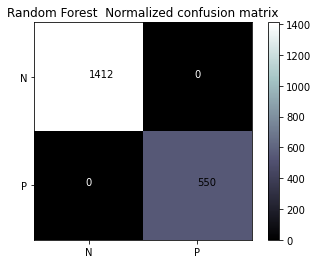

In [104]:
plot_confusion_matrix(rf.predict(testset), 
                      test_label,
                      title="Random Forest ")

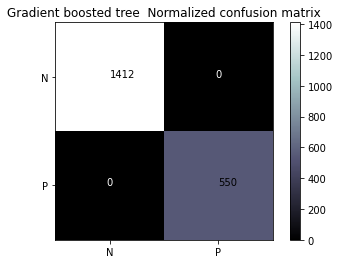

In [105]:
plot_confusion_matrix(gbt.predict(testset), 
                      test_label,
                      title="Gradient boosted tree ")

# commento risultati RF e GBT su dataset normalizzato

il risultato sembra essere molto soddisfacente: ciò potrebbe essere dovuto all' elevato numero di variabili a disposizione 

non vengono identificati in nessuno dei due casi false positive/negative

(il test precedemente era stato fatto correre usando tute le variabili in modo indiscriminato i risultati erano anloghi tutavia risultava un falso negativo dal random forest)

FEATURES IMPORTANCE

In [106]:
print("Random Forest feature importance")
rf.feature_importances_

Random Forest feature importance


array([2.29858293e-05, 1.78007851e-05, 2.61183270e-03, 6.54526220e-03,
       7.30662933e-05, 1.40191850e-03, 3.37484923e-04, 1.98107042e-01,
       1.21560336e-01, 1.62456987e-05, 2.84444943e-03, 6.25617956e-03,
       1.92205539e-02, 1.19047676e-03, 9.52837460e-05, 3.84766698e-03,
       4.08806242e-04, 1.37082820e-01, 7.21789227e-02, 0.00000000e+00,
       2.64981540e-05, 4.56762417e-05, 1.30676627e-03, 1.48279733e-05,
       1.19290269e-04, 2.81865067e-04, 6.73847279e-04, 5.44034828e-02,
       6.51527341e-02, 0.00000000e+00, 6.68994234e-04, 6.82386604e-05,
       1.07481516e-02, 8.67142354e-05, 1.42164142e-04, 1.49254574e-04,
       7.66879962e-04, 9.00169434e-02, 7.16231175e-02, 0.00000000e+00,
       2.80285389e-06, 2.64646671e-05, 4.66591513e-05, 1.39665436e-05,
       2.24724705e-04, 4.03892765e-05, 4.10278118e-04, 5.62597036e-02,
       2.54431337e-02, 0.00000000e+00, 5.07323350e-07, 3.81320528e-05,
       4.22658993e-05, 1.24300367e-04, 7.28312120e-04, 3.15782375e-05,
      

In [107]:
print("Gradient Boosted Tree feature importance")
gbt.feature_importances_

Gradient Boosted Tree feature importance


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.29671108e-07, 0.00000000e+00, 1.89781923e-04, 1.46502330e-04,
       1.25016247e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.66830324e-08,
       3.71889528e-04, 9.99099635e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.74585017e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.41854432e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.89743624e-07, 4.77721640e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

andrebbe approfondito l'aspetto legato alla feature importance per capire bene quali variabili vengono scartate in entrambi i casi e quelle che vengono premiate, 

DATASET NON NORMALIZZATO :

In [108]:
rfA.fit(trainset1, train_label1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2808,
                       verbose=0, warm_start=False)

In [109]:
gbtA.fit(trainset1, train_label1)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2808, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [110]:
rfA.score(trainset1, train_label1), rfA.score(testset1, test_label1)

(1.0, 1.0)

In [111]:
gbtA.score(trainset1, train_label1), gbtA.score(testset1, test_label1)

(1.0, 1.0)

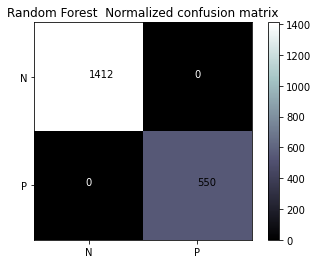

In [112]:
plot_confusion_matrix(rfA.predict(testset1), 
                      test_label1,
                      title="Random Forest ")

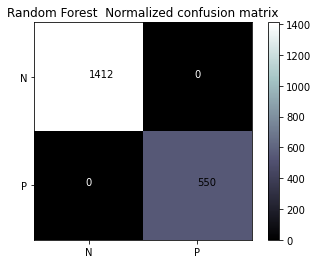

In [113]:
plot_confusion_matrix(gbtA.predict(testset1), 
                      test_label1,
                      title="Random Forest ")

FEATURES IMPORTANCE DATASET NON NORMALIZZATO

In [114]:
print("Random Forest feature importance")
rfA.feature_importances_

Random Forest feature importance


array([3.60194944e-04, 2.26197651e-03, 6.41335455e-03, 1.61540062e-03,
       2.86644383e-06, 8.03893152e-04, 2.22133450e-04, 1.38706178e-01,
       9.15504823e-02, 1.03119439e-05, 2.56234706e-03, 1.04658763e-02,
       1.38616914e-02, 8.82035816e-04, 1.88889403e-05, 6.68554190e-04,
       4.17318675e-04, 1.04621693e-01, 1.31203765e-01, 1.13974117e-05,
       4.18653079e-05, 1.35479855e-03, 3.57282108e-03, 3.12459952e-05,
       4.72009736e-05, 2.31010728e-04, 3.14860076e-04, 5.36341396e-02,
       9.90767855e-02, 0.00000000e+00, 7.30660911e-04, 4.84927544e-05,
       5.08965925e-05, 2.65107788e-05, 4.34209682e-05, 4.30923894e-04,
       1.23928095e-03, 7.62160777e-02, 8.40129322e-02, 7.05633877e-06,
       3.91407964e-05, 8.90629033e-05, 1.54529858e-05, 2.38875507e-05,
       4.16618358e-04, 1.14754238e-04, 7.93565850e-04, 7.36748845e-02,
       3.99838081e-02, 1.39480330e-06, 7.83706573e-06, 6.72335397e-05,
       5.41867271e-05, 1.56826732e-05, 7.48902164e-05, 2.96095155e-04,
      

In [115]:
print("Gradient Boosted Tree feature importance")
gbtA.feature_importances_

Gradient Boosted Tree feature importance


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.04148999e-07, 0.00000000e+00, 1.37736947e-04, 3.26347267e-04,
       9.46523714e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.82590690e-04, 9.99099633e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.87948091e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.23333886e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.73814360e-05, 9.12740881e-08,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# commento dataset NON normalizzato

i risultati sono simili a quelli del dataset normalizzato, poò essere un aspetto positivo

andrebbero confrontati i risultati delle feature importance nel caso dei due dataset

#Hard classification task

In [116]:
allfeatures2.shape

(7848, 65)

dividiamo allfeatures in quelli in cui ddf è attivo e quelli in cui non lo è

In [117]:
allfeatures2[allfeatures2['ddf'] == 1].shape

(2116, 65)

In [118]:
allfeatures2[allfeatures2['ddf'] == 0].shape

(5732, 65)

In [119]:
ddfONset = allfeatures2[allfeatures2['ddf'] == 1]
ddfONset.shape

(2116, 65)

In [120]:
ddfOFFset = allfeatures2[allfeatures2['ddf'] == 0]
ddfOFFset.shape

(5732, 65)

In [121]:
labelON = ddfONset['target']
labelOFF = ddfOFFset['target']
labelON.shape, labelOFF.shape

((2116,), (5732,))

In [122]:
ddfONset = ddfONset.drop('target', axis= 1)
ddfOFFset = ddfOFFset.drop('target', axis= 1)

splitting hard classification task

In [123]:
trainON, testON, train_lON, test_lON = train_test_split(ddfONset,
                                labelON, train_size=0.75, test_size=0.25, random_state= 118)

In [124]:
trainOFF, testOFF, train_lOFF, test_lOFF = train_test_split(ddfOFFset,
                                labelOFF, train_size=0.75, test_size=0.25, random_state= 118)

preparo il mio GBT per la classificazione 

In [125]:
gbtON = GradientBoostingClassifier(max_depth= 4, random_state = 118)
gbtOFF = GradientBoostingClassifier(max_depth= 4, random_state = 118)

pprint(gbtON.get_params()),pprint(gbtOFF.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 118,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 118,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose

(None, None)

In [126]:
gbtON.fit(trainON, train_lON), gbtOFF.fit(trainOFF, train_lOFF)

(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=4,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=118, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=4,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_

In [127]:
gbtON.score(trainON, train_lON), gbtON.score(testON, test_lON)

(1.0, 0.775047258979206)

In [128]:
gbtOFF.score(trainOFF, train_lOFF), gbtOFF.score(testOFF, test_lOFF)

(0.9825540823447313, 0.677599441730635)

In [129]:
print("Gradient Boosted Tree feature importance")
gbtON.feature_importances_

Gradient Boosted Tree feature importance


array([1.06593801e-02, 4.62622625e-03, 5.22848234e-03, 1.42949023e-02,
       1.52153921e-02, 2.05299970e-03, 1.17801074e-02, 2.44534366e-03,
       6.10963989e-03, 1.59578275e-04, 9.10361787e-03, 3.66590666e-02,
       1.44825356e-02, 1.78025369e-02, 2.79569730e-02, 2.79092451e-03,
       2.45940368e-03, 3.47072523e-03, 1.16857005e-02, 4.54062992e-04,
       9.24668346e-02, 4.30276945e-03, 8.02221610e-02, 1.22135992e-02,
       1.87542129e-02, 4.06778250e-03, 4.45692475e-03, 3.15141048e-03,
       7.50405225e-03, 1.17029497e-05, 1.19595339e-02, 3.82513025e-03,
       4.10926625e-02, 1.24778467e-02, 4.36269433e-02, 2.86905423e-03,
       3.85909537e-03, 2.63943300e-03, 4.29740222e-03, 1.92360797e-04,
       4.69161979e-03, 7.29479218e-03, 2.14199809e-02, 1.06175166e-02,
       1.14733386e-02, 3.02062594e-03, 5.59714526e-03, 2.17800437e-03,
       5.77358929e-03, 3.51410738e-05, 8.34546828e-03, 9.59080802e-03,
       3.89363613e-03, 1.71247727e-02, 1.37490631e-02, 4.58636612e-03,
      

In [130]:
print("Gradient Boosted Tree feature importance")
gbtOFF.feature_importances_

Gradient Boosted Tree feature importance


array([1.18661953e-02, 2.53954161e-03, 3.72913185e-03, 4.00851005e-02,
       1.60718951e-02, 3.06753991e-03, 4.14529807e-03, 4.00355499e-03,
       4.57014461e-03, 5.19732916e-05, 1.28172140e-02, 4.50838913e-03,
       8.37197773e-03, 1.26132012e-02, 1.22188774e-02, 4.99897614e-03,
       4.76794621e-03, 4.25518635e-03, 5.87493325e-03, 1.49697654e-04,
       1.43024098e-02, 1.17092050e-02, 1.54222440e-01, 1.79829012e-02,
       1.70768886e-02, 5.78672634e-03, 5.56497748e-03, 3.13591707e-03,
       5.08673797e-03, 1.64206030e-04, 2.42117914e-02, 9.42146443e-03,
       3.35586429e-02, 1.46412290e-02, 1.29157670e-02, 2.15830282e-03,
       4.08582963e-03, 3.22973813e-03, 5.77720517e-03, 1.36783099e-04,
       1.42853790e-02, 1.53754179e-02, 2.32602902e-02, 1.91915138e-02,
       2.43112020e-02, 5.21583793e-03, 8.37262849e-03, 4.59337275e-03,
       3.17215034e-03, 1.28255346e-04, 1.42703140e-02, 1.63616656e-02,
       5.14649608e-03, 1.80421211e-02, 1.67395625e-02, 3.08238001e-03,
      

#hard classification task results

ci potrebbe essere overtraining del modello, stranamente la variabile decl non viene presa in considerazione nei due gradient boosted tree methods

# visualization of features' space 2D t-SNE projection 

è stato usato il codice del notebook di riferimento per realizzare il t-SNE

In [131]:
from sklearn.manifold import TSNE

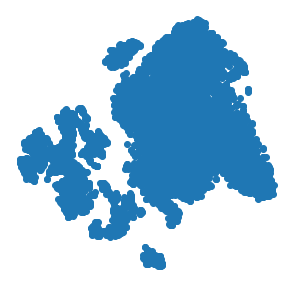

Figure: the 2D projection of the ~70-dimensional feature space we created by extracting features from the time series. The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledianpairwise distances existing in the higher dimensional parameter space. How many clusters can you see in this embedding?A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, this is the only cxase in which you are allowed not to label your axes!


In [132]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(scaledFeatures)
X_embedded.shape
pl.figure(figsize=(5,5))
pl.scatter(X_embedded[:,0], X_embedded[:,1])
pl.axis('off')
pl.show()
print("Figure: the 2D projection of the ~70-dimensional feature space we created by extracting features from the time series. " + 
      "The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: " + 
      "t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledian" + 
      "pairwise distances existing in the higher dimensional parameter space. " + 
      "How many clusters can you see in this embedding?" + 
      "A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, " + 
      "this is the only cxase in which you are allowed not to label your axes!")

la rappresentazione tramite t-SNE sembra identificare 3/4 gruppi abbastanza distinti tra loro

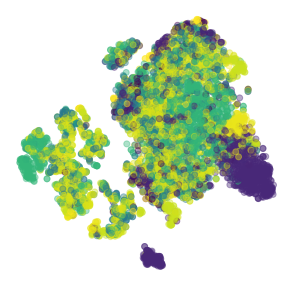

In [133]:
norm_obj= Normalize(vmin=labels2.min(), vmax=labels2.max())
len([c for c in pl.cm.RdBu_r(norm_obj(labels2))]), X_embedded.shape
pl.figure(figsize=(5,5))
pl.axis('off')
pl.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in pl.cm.viridis(norm_obj(labels2))], alpha=0.4);
           


dalla rappresentazione sembrerebbe che la target sia distribuita in modo disomogeneo nei 3/4 sootinsiemi

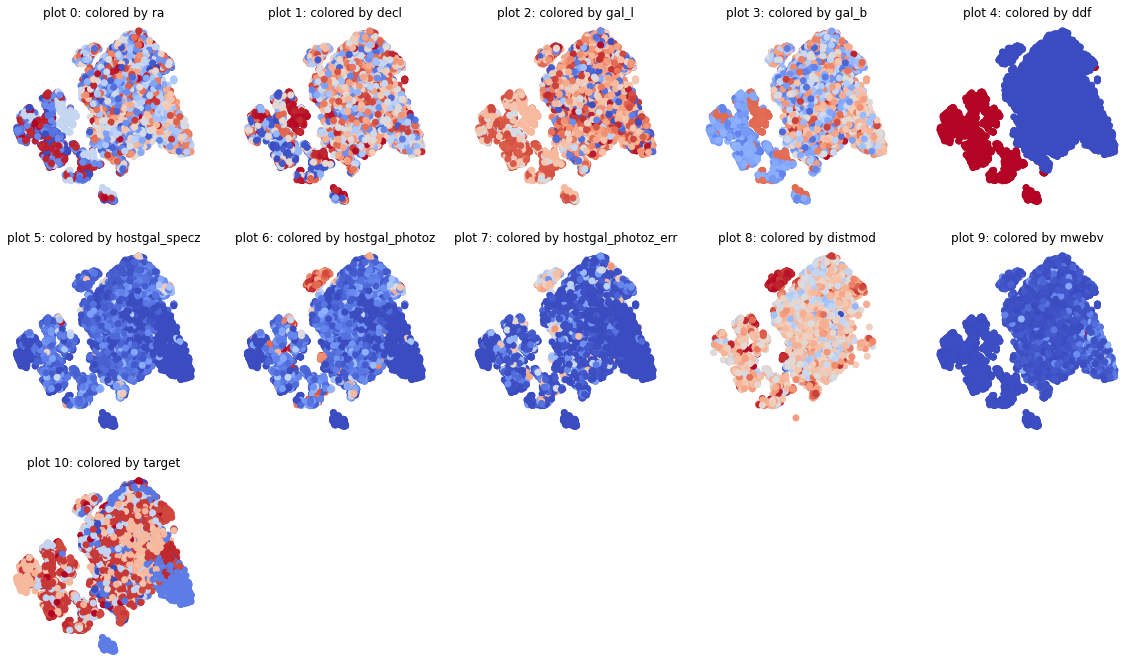

In [134]:
fig = pl.figure(figsize=(20,20))
# note: I am avoiding the first column of metadata which is the object identifier
for i, col in enumerate(metadata.columns[1:]):
    ax = fig.add_subplot(5,5,i+1)
    v = metadata[col].astype(float)
    ax.set_title("plot %d: colored by %s"%(i,col))
    ax.scatter(X_embedded[:,0], X_embedded[:,1],  
               color=[pl.cm.coolwarm(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])
    ax.axis('off')

colorazione taget non buon: poca omogeneità , ddf  bene con un punto a metà via e uno in alto, forse il falso positivo o negativo evidenziato nel  RF prima delle selezione accurata dei parametri

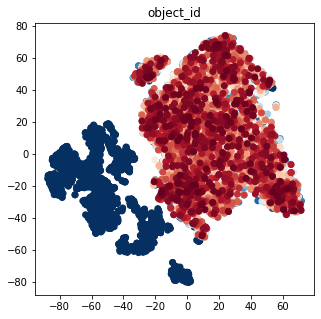

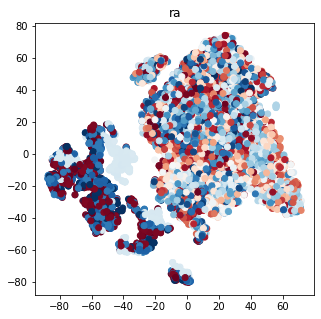

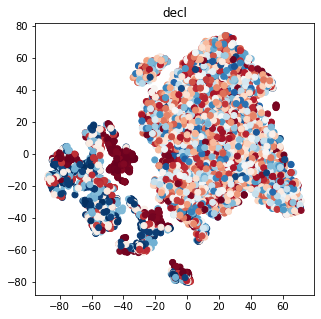

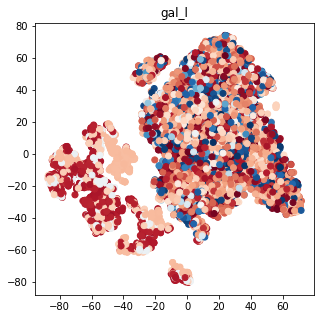

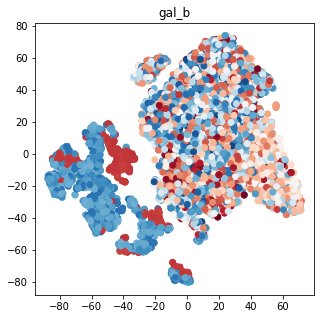

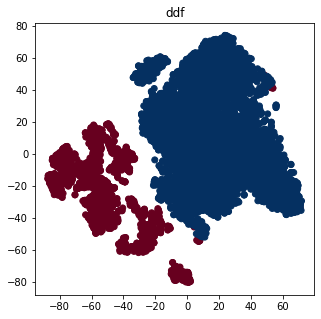

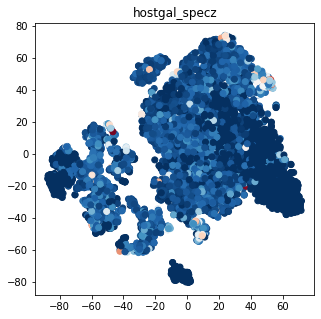

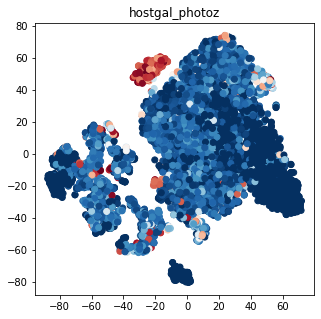

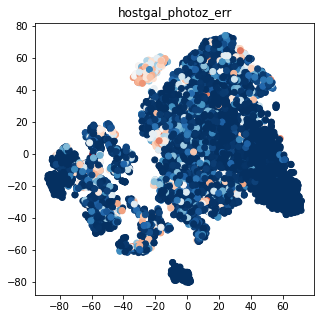

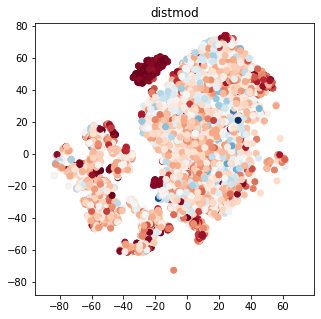

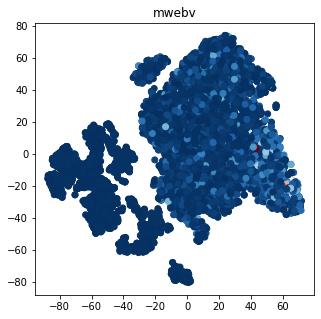

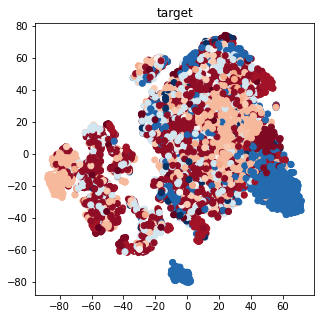

In [135]:
for col in metadata.columns:
    v = metadata[col].astype(float)
    pl.figure(figsize=(5,5))
    pl.title(col)
    pl.scatter(X_embedded[:,0], X_embedded[:,1],  color=[pl.cm.RdBu_r(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])

    pl.show()

la rappresentazione del decl è molto disomogenea, potrebbe giustificare la scelta dei due gradient boosted tree sviluppati nell'hard classification task